Analyzing Taylor Swift Splotify data from kaggle

**Exploratory Data Analysis**

This notebook focuses on the first step of any data science project.
EDA or exploratory Data Analysis is to get familiar to our data, identifying important columns, perform data manipulation and asking interesting questions from our data visualization tools.

Try doing valence analysis of each song, or find what makes a song popular.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns 

In [ ]:
swift_dataset = pd.read_csv('/content/drive/MyDrive/Data Projects/Taylor Swift/spotify_taylorswift.csv',encoding='ISO-8859-1')

In [ ]:
swift_dataset.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
swift_dataset[['length','popularity','energy','loudness','valence']].describe()

,length,popularity,energy,loudness,valence
count,171.000000,171.000000,171.000000,171.000000,171.000000
mean,236663.520468,61.228070,0.585977,-7.322111,0.422984
std,40456.720158,11.904548,0.189577,2.878787,0.192617
min,107133.000000,0.000000,0.118000,-17.932000,0.049900
25%,211833.000000,58.000000,0.462000,-8.861500,0.277500
50%,234000.000000,63.000000,0.606000,-6.698000,0.416000
75%,254447.000000,67.000000,0.732000,-5.336500,0.545000
max,403887.000000,82.000000,0.944000,-2.098000,0.942000


Observation: There are 171 rows in the dataset and there are no missing data in numeric columns.

In [ ]:
swift_dataset[swift_dataset['length'] == 403887]

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
19,19,Dear John,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,403887,48,0.583,0.183,0.468,0.000002,0.111,-5.378,0.0278,0.126,119.375


In [ ]:
swift_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        171 non-null    int64  
 1   name              171 non-null    object 
 2   album             171 non-null    object 
 3   artist            171 non-null    object 
 4   release_date      171 non-null    object 
 5   length            171 non-null    int64  
 6   popularity        171 non-null    int64  
 7   danceability      171 non-null    float64
 8   acousticness      171 non-null    float64
 9   energy            171 non-null    float64
 10  instrumentalness  171 non-null    float64
 11  liveness          171 non-null    float64
 12  loudness          171 non-null    float64
 13  speechiness       171 non-null    float64
 14  valence           171 non-null    float64
 15  tempo             171 non-null    float64
dtypes: float64(9), int64(3), object(4)
memory us

Observation: There are no missing values in the dataframe.

In [ ]:
swift_dataset['popularity'].fillna(swift_dataset['popularity'].mean(), inplace=True)

In [ ]:
swift_dataset.shape

(171, 16)

In [ ]:
correlation = swift_dataset[['length','popularity','energy','loudness','valence']].corr()
correlation

,length,popularity,energy,loudness,valence
length,1.000000,0.011772,-0.114792,0.044126,-0.420405
popularity,0.011772,1.000000,0.127495,0.122576,0.034154
energy,-0.114792,0.127495,1.000000,0.784973,0.490371
loudness,0.044126,0.122576,0.784973,1.000000,0.299926
valence,-0.420405,0.034154,0.490371,0.299926,1.000000


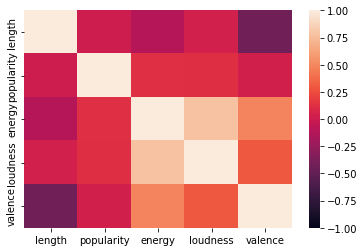

In [ ]:
sns.heatmap(correlation, vmin = -1, vmax = 1)

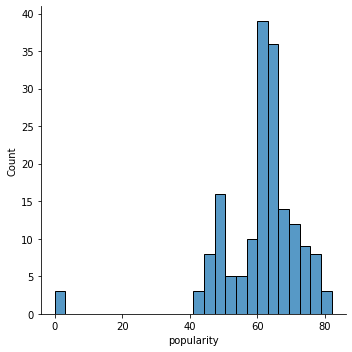

In [ ]:
sns.displot(swift_dataset['popularity']);

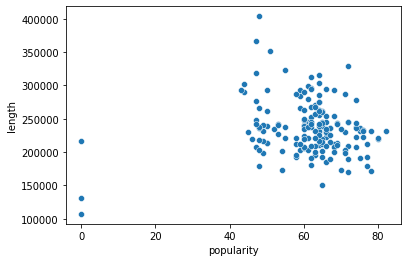

In [ ]:
sns.scatterplot(x=swift_dataset['popularity'], y= swift_dataset['length'])

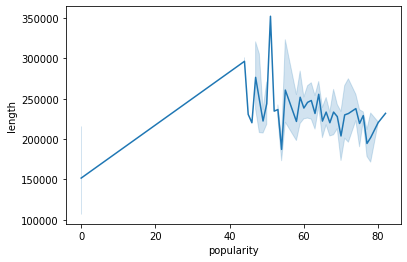

In [ ]:
sns.lineplot(x=swift_dataset['popularity'], y= swift_dataset['length'])

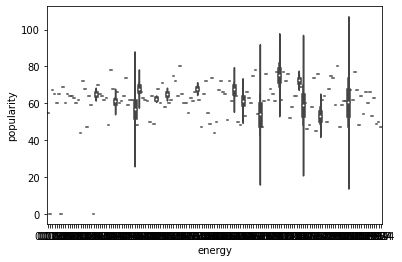

In [ ]:
sns.violinplot(x='energy', y='popularity', data = swift_dataset)

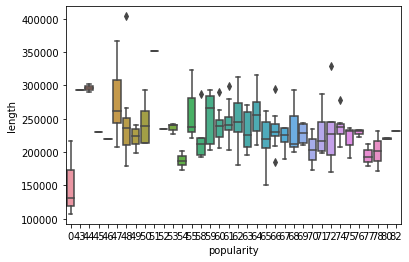

In [ ]:
sns.boxplot(y = 'length', x = 'popularity', data = swift_dataset)


In [ ]:
swift_dataset['popularity'].value_counts()

64    15
62    12
65    11
60    11
66    10
63     8
61     8
48     7
72     6
47     6
74     6
68     5
67     5
58     5
50     5
59     5
69     4
71     4
49     4
0      3
53     3
76     3
75     3
55     3
77     3
44     2
78     2
54     2
80     2
70     2
43     1
51     1
82     1
45     1
46     1
52     1
Name: popularity, dtype: int64

In [ ]:
popular_song = swift_dataset[swift_dataset['popularity'] == 82]
popular_song

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
60,60,Blank Space,1989 (Deluxe),Taylor Swift,2014-01-01,231826,82,0.76,0.103,0.703,0.0,0.0913,-5.412,0.054,0.57,95.997


In [ ]:
popular_song['popularity'].value_counts()

82    1
Name: popularity, dtype: int64